<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-capstone-project-college/blob/main/notebooks/02_eda_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Raw Spotify Reviews**

This notebook performs an initial Exploratory Data Analysis (EDA) on the raw dataset of Spotify app reviews. The goal is to understand the basic structure, quality, and characteristics of the data before any preprocessing steps are applied.

## **1. Setup and Library Imports**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import os

# Set plot style
sns.set_style('whitegrid')

## **2. Data Loading and Initial Inspection**

Loading the dataset from the specified CSV file into a pandas DataFrame.

In [149]:
# English comment dataset
data_en_1 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_au_1.csv'
data_en_2 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_au_2.csv'
data_en_3 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_uk_1.csv'
data_en_4 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_uk_2.csv'
data_en_5 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_us_1.csv'
data_en_6 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_us_2.csv'

# Indonesian comment dataset
data_id_1 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_id_id_1.csv'
data_id_2 = 'https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_id_id_2.csv'

In [150]:
# Create empty lists to store dataframes
en_dfs = []
id_dfs = []

In [151]:
# List of English data file paths
english_files = [data_en_1, data_en_2, data_en_3, data_en_4, data_en_5, data_en_6]

# Iterate through English files and load them
for file_path in english_files:
    try:
        df = pd.read_csv(file_path)
        en_dfs.append(df)
        print(f"Successfully loaded {file_path}")
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")


# Concatenate English dataframes
if en_dfs:
    raw_en_df = pd.concat(en_dfs, ignore_index=True)
    print(f"\nEnglish dataset loaded successfully with {len(raw_en_df)} reviews.")
else:
    raw_en_df = None
    print("\nNo English dataframes were loaded.")

Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_au_1.csv
Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_au_2.csv
Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_uk_1.csv
Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_uk_2.csv
Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_us_1.csv
Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_en_us_2.csv

English d

In [152]:
# List of Indonesian data file paths
indonesian_files = [data_id_1, data_id_2]

# Iterate through Indonesian files and load them
for file_path in indonesian_files:
    try:
        df = pd.read_csv(file_path)
        id_dfs.append(df)
        print(f"Successfully loaded {file_path}")
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")


# Concatenate Indonesian dataframes
if id_dfs:
    raw_id_df = pd.concat(id_dfs, ignore_index=True)
    print(f"\nIndonesian dataset loaded successfully with {len(raw_id_df)} reviews.")
else:
    raw_id_df = None
    print("\nNo Indonesian dataframes were loaded.")

Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_id_id_1.csv
Successfully loaded https://raw.githubusercontent.com/LatiefDataVisionary/data-science-capstone-project-college/refs/heads/main/data/raw/spotify_reviews_id_id_2.csv

Indonesian dataset loaded successfully with 65000 reviews.


Displaying the first 5 rows of the DataFrame to get a glimpse of the data structure and content.

In [153]:
if raw_en_df is not None:
    print("First 5 rows of English Reviews DataFrame (raw_en_df):")
    display(raw_en_df.head())

First 5 rows of English Reviews DataFrame (raw_en_df):


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,97b3a330-8135-4961-963b-d5b40aeaa80a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"they fixed it, I was just really pissy yesterd...",5,1,9.0.82.1032,2025-09-27 22:44:08,NaN,NaN,9.0.82.1032
1,39a62a75-3998-483e-aca2-8719d3f8dd57,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Offline doesnt work, support doesnt help, just...",1,0,9.0.82.1032,2025-09-27 21:48:01,Hello. Thanks for bringing this to our attenti...,2025-09-27 21:52:49,9.0.82.1032
2,03c513ab-df54-42a2-aa3c-7502c086d875,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Super annoying ad experience! It feels like th...,1,5,9.0.56.591,2025-09-27 06:05:50,NaN,NaN,9.0.56.591
3,5f769b79-7d95-4129-8078-1dc62d8f2b2b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,1,9.0.82.1032,2025-09-27 06:02:10,NaN,NaN,9.0.82.1032
4,fd4665c6-ed09-4af0-94a2-06b8f5e2d8c4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,super song for everything,5,0,9.0.80.1343,2025-09-27 06:01:26,NaN,NaN,9.0.80.1343


In [154]:
if raw_id_df is not None:
    print("\nFirst 5 rows of Indonesian Reviews DataFrame (raw_id_df):")
    display(raw_id_df.head())


First 5 rows of Indonesian Reviews DataFrame (raw_id_df):


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,427e2299-b27a-4f53-89ac-15f9885207c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,lagu bukan hanya alunan nada tapi bisa jadi un...,1,2,NaN,2025-09-28 05:29:11,NaN,NaN,NaN
1,790cee66-b937-41ba-b7a8-e831c60f63a4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,iklan Mulu gak jelass apa apa harus premium ko...,1,0,9.0.82.1032,2025-09-28 03:08:45,NaN,NaN,9.0.82.1032
2,2a59f6d0-fa47-4e26-b097-9ef0ddc824f6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terima kasih banyak 🙏👍👍👍,5,0,NaN,2025-09-27 06:05:37,NaN,NaN,NaN
3,0d356a00-bd64-4539-a23f-aaa7e46c98d8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kok di aku mah gk bisa ada lirik ya sih tolong...,4,0,9.0.82.1032,2025-09-27 06:03:26,NaN,NaN,9.0.82.1032
4,0349c341-fad0-4e60-8952-28dc1cb43659,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat banyak lagu nya,5,0,9.0.80.1343,2025-09-27 05:56:16,NaN,NaN,9.0.80.1343


Printing concise information about the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage. This helps in understanding the data types and identifying potential missing values.

In [155]:
if raw_id_df is not None:
    print("\nThe informaton of English Reviews DataFrame (raw_enn_df):")
    display(raw_en_df.info())


The informaton of English Reviews DataFrame (raw_enn_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155000 entries, 0 to 154999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              155000 non-null  object
 1   userName              155000 non-null  object
 2   userImage             155000 non-null  object
 3   content               154992 non-null  object
 4   score                 155000 non-null  int64 
 5   thumbsUpCount         155000 non-null  int64 
 6   reviewCreatedVersion  134926 non-null  object
 7   at                    155000 non-null  object
 8   replyContent          14061 non-null   object
 9   repliedAt             14061 non-null   object
 10  appVersion            134926 non-null  object
dtypes: int64(2), object(9)
memory usage: 13.0+ MB


None

In [156]:
if raw_id_df is not None:
    print("\nThe informaiton of Indonesian Reviews DataFrame (raw_id_df):")
    display(raw_id_df.info())


The informaiton of Indonesian Reviews DataFrame (raw_id_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              65000 non-null  object
 1   userName              65000 non-null  object
 2   userImage             65000 non-null  object
 3   content               65000 non-null  object
 4   score                 65000 non-null  int64 
 5   thumbsUpCount         65000 non-null  int64 
 6   reviewCreatedVersion  48732 non-null  object
 7   at                    65000 non-null  object
 8   replyContent          1439 non-null   object
 9   repliedAt             1439 non-null   object
 10  appVersion            48732 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.5+ MB


None

Generating descriptive statistics for both the numerical and categorical columns in the DataFrame. This provides insights into the central tendency, dispersion, and shape of the distribution of numerical data.

In [157]:
if raw_en_df is not None:
    print("Descriptive statistics for English Reviews DataFrame (raw_en_df):")
    display(raw_en_df.describe(include='all'))

Descriptive statistics for English Reviews DataFrame (raw_en_df):


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
count,155000,155000,155000,154992,155000.000000,155000.000000,134926,155000,14061,14061,134926
unique,74069,2994,3003,65943,NaN,NaN,498,73891,2252,5802,498
top,d72295a1-8f55-49ed-b629-1c191de4ef62,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,NaN,NaN,9.0.68.632,2025-09-16 12:24:03,Hey! We hear you and we'll pass your feedback ...,2025-09-07 15:52:39,9.0.68.632
freq,6,151993,151993,2234,NaN,NaN,18752,12,1216,6,18752
mean,NaN,NaN,NaN,NaN,4.206206,8.154148,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.461646,173.687554,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [158]:
if raw_id_df is not None:
    print("\nDescriptive statistics for Indonesian Reviews DataFrame (raw_id_df):")
    display(raw_id_df.describe(include='all'))


Descriptive statistics for Indonesian Reviews DataFrame (raw_id_df):


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
count,65000,65000,65000,65000,65000.000000,65000.000000,48732,65000,1439,1439,48732
unique,59183,1614,1615,44694,NaN,NaN,411,59111,563,1434,411
top,1c362127-ea44-4322-b1de-436f45904463,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,NaN,NaN,9.0.2.459,2025-09-25 14:14:58,"Hai, apakah Anda sudah mencoba menginstal ulan...",2025-08-14 15:58:40,9.0.2.459
freq,2,63385,63385,1833,NaN,NaN,3276,4,90,2,3276
mean,NaN,NaN,NaN,NaN,4.337231,5.492569,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.340434,78.316078,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN


## **3. Data Quality Check**

### **3.1. Check for Missing Values**

Checking for missing values in each column and summing them up to get a total count of missing entries per column.

In [159]:
if raw_en_df is not None:
    print("Missing values per column (English dataset - raw_en_df):")
    missing_values_en = raw_en_df.isnull().sum()
    print(missing_values_en)

Missing values per column (English dataset - raw_en_df):
reviewId                     0
userName                     0
userImage                    0
content                      8
score                        0
thumbsUpCount                0
reviewCreatedVersion     20074
at                           0
replyContent            140939
repliedAt               140939
appVersion               20074
dtype: int64


In [160]:
if raw_id_df is not None:
    print("\nMissing values per column (Indonesian dataset - raw_id_df):")
    missing_values_id = raw_id_df.isnull().sum()
    print(missing_values_id)


Missing values per column (Indonesian dataset - raw_id_df):
reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    16268
at                          0
replyContent            63561
repliedAt               63561
appVersion              16268
dtype: int64


### **3.2. Count the Duplicate Rows**

Checking for and counting duplicate rows in the DataFrame. Duplicate rows can skew analysis and should be identified.

In [161]:
if raw_en_df is not None:
    duplicate_rows_en = raw_en_df.duplicated().sum()
    print(f"\nNumber of duplicate rows (English dataset - raw_en_df): {duplicate_rows_en}")
    print(f'The total length: {len(raw_en_df)}')


Number of duplicate rows (English dataset - raw_en_df): 77922
The total length: 155000


In [162]:
if raw_id_df is not None:
    duplicate_rows_id = raw_id_df.duplicated().sum()
    print(f"Number of duplicate rows (Indonesian dataset - raw_id_df): {duplicate_rows_id}")
    print(f'The total length: {len(raw_id_df)}')

Number of duplicate rows (Indonesian dataset - raw_id_df): 5754
The total length: 65000


### **3.3. Handling Duplicate Rows**

Removing duplicate rows from both the English and Indonesian DataFrames to ensure each review is unique and does not skew the analysis.

In [163]:
if raw_en_df is not None:
    initial_rows_en = len(raw_en_df)
    raw_en_df.drop_duplicates(inplace=True)
    rows_after_dropping_duplicates_en = len(raw_en_df)
    print(f"English dataset: Removed {initial_rows_en - rows_after_dropping_duplicates_en} duplicate rows.")
    print(f"English dataset: Remaining rows after dropping duplicates: {rows_after_dropping_duplicates_en}")

English dataset: Removed 77922 duplicate rows.
English dataset: Remaining rows after dropping duplicates: 77078


In [164]:
if raw_id_df is not None:
    initial_rows_id = len(raw_id_df)
    raw_id_df.drop_duplicates(inplace=True)
    rows_after_dropping_duplicates_id = len(raw_id_df)
    print(f"\nIndonesian dataset: Removed {initial_rows_id - rows_after_dropping_duplicates_id} duplicate rows.")
    print(f"Indonesian dataset: Remaining rows after dropping duplicates: {rows_after_dropping_duplicates_id}")


Indonesian dataset: Removed 5754 duplicate rows.
Indonesian dataset: Remaining rows after dropping duplicates: 59246


**Summary of Data Quality:**

Based on the checks above:
- We can see the number of missing values in each column for both English and Indonesian datasets.
- We have identified and removed the total count of duplicate rows in both datasets.

This initial assessment helps us understand the cleanliness of the raw data and highlights areas that may require attention during preprocessing, especially regarding missing values in certain columns.

## **4. Analysis of Review Ratings (score)**

Visualizing the distribution of review scores using a count plot to understand the frequency of each rating (1 to 5 stars).

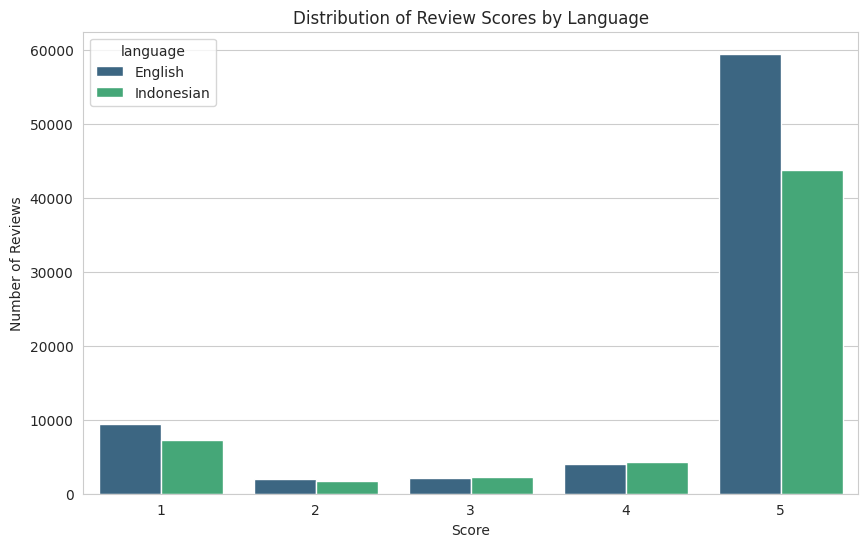

In [165]:
if raw_en_df is not None and raw_id_df is not None and 'score' in raw_en_df.columns and 'score' in raw_id_df.columns:
    # Add a language column to differentiate between English and Indonesian reviews
    raw_en_df['language'] = 'English'
    raw_id_df['language'] = 'Indonesian'

    # Combine the dataframes
    combined_df = pd.concat([raw_en_df, raw_id_df], ignore_index=True)

    # Create the count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=combined_df, x='score', hue='language', palette='viridis')
    plt.title('Distribution of Review Scores by Language')
    plt.xlabel('Score')
    plt.ylabel('Number of Reviews')
    plt.show()
elif raw_en_df is not None and 'score' in raw_en_df.columns:
    print("Only English data available. Plotting English score distribution.")
    plt.figure(figsize=(8, 6))
    sns.countplot(data=raw_en_df, x='score', palette='viridis')
    plt.title('Distribution of English Review Scores')
    plt.xlabel('Score')
    plt.ylabel('Number of Reviews')
    plt.show()
elif raw_id_df is not None and 'score' in raw_id_df.columns:
    print("Only Indonesian data available. Plotting Indonesian score distribution.")
    plt.figure(figsize=(8, 6))
    sns.countplot(data=raw_id_df, x='score', palette='viridis')
    plt.title('Distribution of Indonesian Review Scores')
    plt.xlabel('Score')
    plt.ylabel('Number of Reviews')
    plt.show()
else:
    print("Score data is not available in either dataframe for plotting.")

A table summarizing the distribution of review scores by count and percentage for both English and Indonesian datasets.

In [166]:
if combined_df is not None:
    # Group by language and score, then count
    score_distribution = combined_df.groupby(['language', 'score']).size().reset_index(name='count')

    # Calculate percentage
    score_distribution['percentage'] = score_distribution.groupby('language')['count'].transform(lambda x: x / x.sum() * 100)

    print("Summary of Review Score Distribution by Language:")
    display(score_distribution)
else:
    print("Combined dataframe is not available to display score distribution table.")

Summary of Review Score Distribution by Language:


,language,score,count,percentage
0,English,1,9428,12.231765
1,English,2,1977,2.564934
2,English,3,2175,2.821817
3,English,4,4012,5.205117
4,English,5,59486,77.176367
5,Indonesian,1,7279,12.286062
6,Indonesian,2,1731,2.921716
7,Indonesian,3,2263,3.819667
8,Indonesian,4,4245,7.165041
9,Indonesian,5,43728,73.807514


**Analysis of Score Distribution:**

The count plot and the summary table reveal the distribution of star ratings for both English and Indonesian reviews. Both datasets show a strong skew towards higher scores, particularly 5-star reviews, indicating a generally positive sentiment among users who left reviews.

Specifically:
- For English reviews, approximately 77.2% are 5-star ratings, followed by 12.2% as 1-star ratings. The distribution for scores 2, 3, and 4 are significantly lower.
- For Indonesian reviews, about 73.8% are 5-star ratings, with 12.3% being 1-star ratings. Similar to the English dataset, scores 2, 3, and 4 have much fewer reviews.

Both languages exhibit a similar pattern with a large proportion of highly positive reviews and a notable number of the lowest (1-star) ratings, suggesting a polarization in user feedback. The distribution for scores between 1 and 5 is sparse in comparison to the extreme ends.

## **5. Analysis of Review Text (content)**

### **5.1: Review Length Analysis**

Creating new columns for character length and word count of each review in the `content` column.

In [167]:
if raw_en_df is not None and 'content' in raw_en_df.columns:
    raw_en_df['char_length'] = raw_en_df['content'].astype(str).apply(len)
    raw_en_df['word_count'] = raw_en_df['content'].astype(str).apply(lambda x: len(x.split()))
    print("Character length and word count columns added to raw_en_df.")
else:
    print("raw_en_df is None or 'content' column not found in raw_en_df. Cannot add length/count columns.")

if raw_id_df is not None and 'content' in raw_id_df.columns:
    raw_id_df['char_length'] = raw_id_df['content'].astype(str).apply(len)
    raw_id_df['word_count'] = raw_id_df['content'].astype(str).apply(lambda x: len(x.split()))
    print("Character length and word count columns added to raw_id_df.")
else:
    print("raw_id_df is None or 'content' column not found in raw_id_df. Cannot add length/count columns.")

Character length and word count columns added to raw_en_df.
Character length and word count columns added to raw_id_df.


Generating histograms to visualize the distribution of review lengths based on character count and word count.

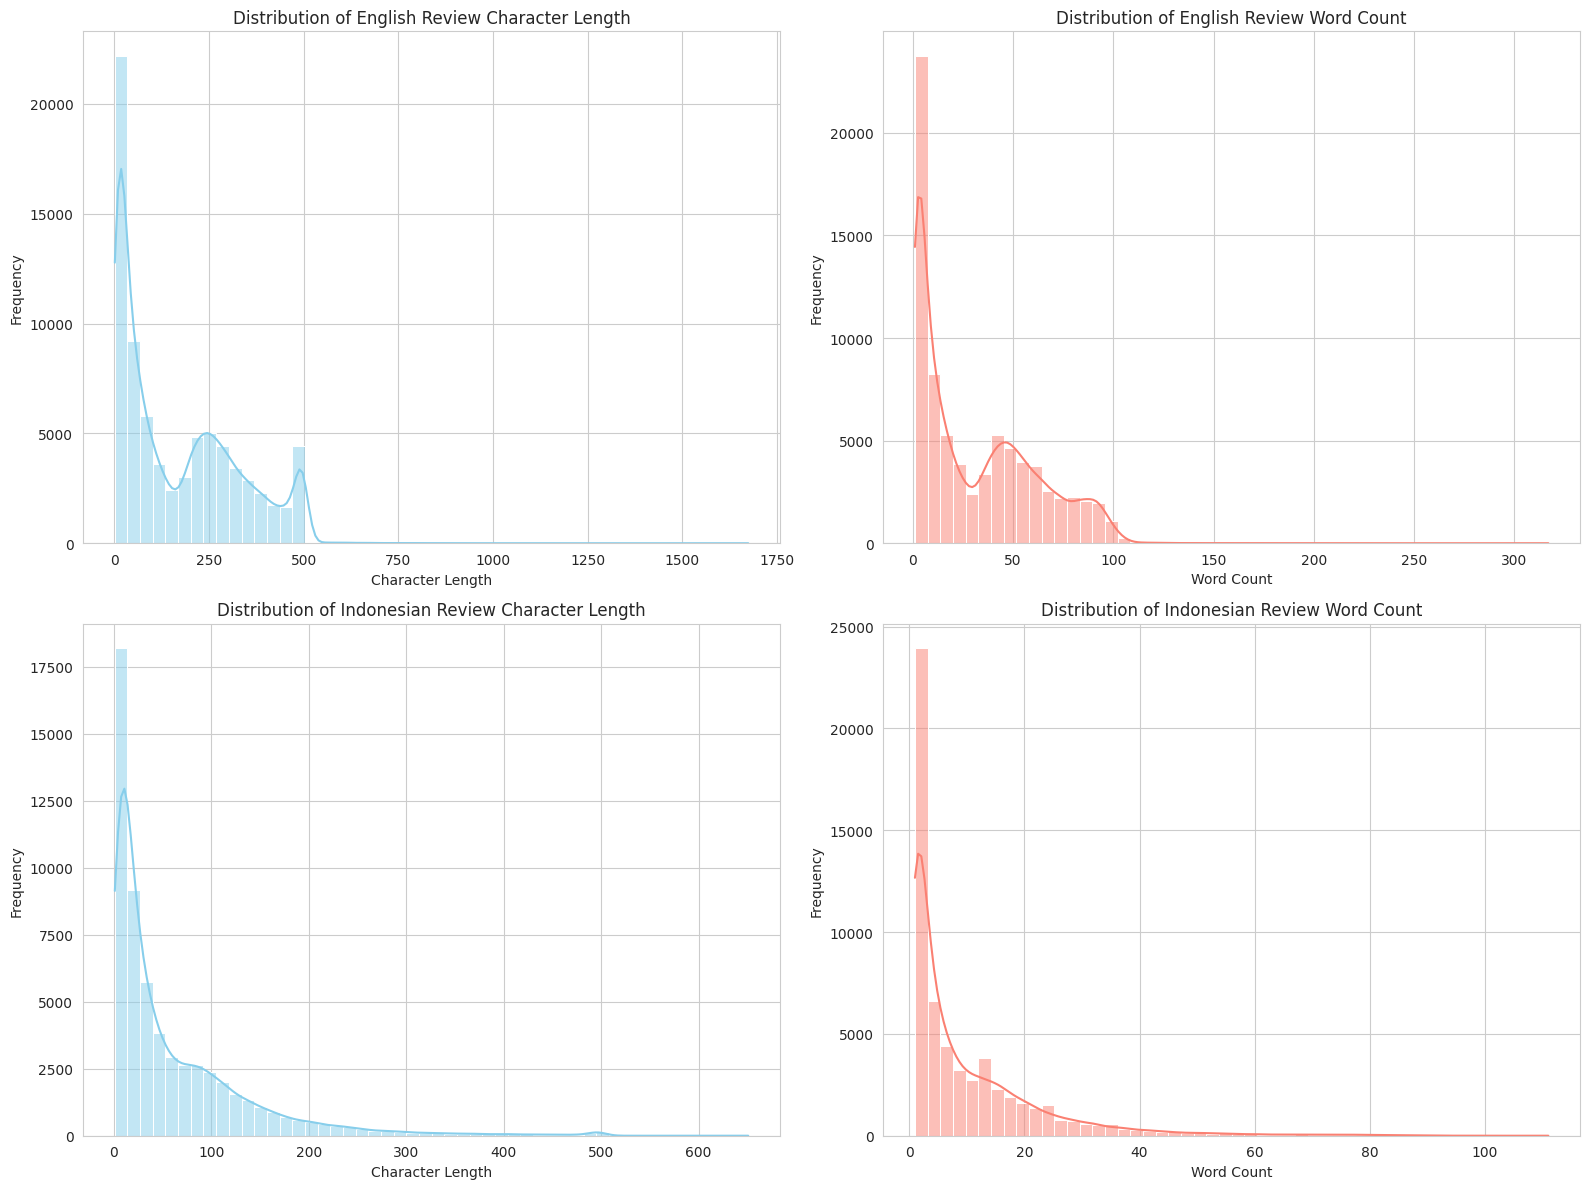

In [168]:
if raw_en_df is not None and 'char_length' in raw_en_df.columns and 'word_count' in raw_en_df.columns and \
   raw_id_df is not None and 'char_length' in raw_id_df.columns and 'word_count' in raw_id_df.columns:

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    sns.histplot(data=raw_en_df, x='char_length', bins=50, ax=axes[0, 0], kde=True, color='skyblue')
    axes[0, 0].set_title('Distribution of English Review Character Length')
    axes[0, 0].set_xlabel('Character Length')
    axes[0, 0].set_ylabel('Frequency')

    sns.histplot(data=raw_en_df, x='word_count', bins=50, ax=axes[0, 1], kde=True, color='salmon')
    axes[0, 1].set_title('Distribution of English Review Word Count')
    axes[0, 1].set_xlabel('Word Count')
    axes[0, 1].set_ylabel('Frequency')

    sns.histplot(data=raw_id_df, x='char_length', bins=50, ax=axes[1, 0], kde=True, color='skyblue')
    axes[1, 0].set_title('Distribution of Indonesian Review Character Length')
    axes[1, 0].set_xlabel('Character Length')
    axes[1, 0].set_ylabel('Frequency')

    sns.histplot(data=raw_id_df, x='word_count', bins=50, ax=axes[1, 1], kde=True, color='salmon')
    axes[1, 1].set_title('Distribution of Indonesian Review Word Count')
    axes[1, 1].set_xlabel('Word Count')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

elif raw_en_df is not None and 'char_length' in raw_en_df.columns and 'word_count' in raw_en_df.columns:
    print("Only English data available. Plotting English review length distributions.")
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data=raw_en_df, x='char_length', bins=50, ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title('Distribution of English Review Character Length')
    axes[0].set_xlabel('Character Length')
    axes[0].set_ylabel('Frequency')
    sns.histplot(data=raw_en_df, x='word_count', bins=50, ax=axes[1], kde=True, color='salmon')
    axes[1].set_title('Distribution of English Review Word Count')
    axes[1].set_xlabel('Word Count')
    axes[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

elif raw_id_df is not None and 'char_length' in raw_id_df.columns and 'word_count' in raw_id_df.columns:
    print("Only Indonesian data available. Plotting Indonesian review length distributions.")
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data=raw_id_df, x='char_length', bins=50, ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title('Distribution of Indonesian Review Character Length')
    axes[0].set_xlabel('Character Length')
    axes[0].set_ylabel('Frequency')
    sns.histplot(data=raw_id_df, x='word_count', bins=50, ax=axes[1], kde=True, color='salmon')
    axes[1].set_title('Distribution of Indonesian Review Word Count')
    axes[1].set_xlabel('Word Count')
    axes[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

else:
    print("Review length data is not available in either dataframe for plotting.")

**Analysis of Review Length:**

The histograms show the distribution of how long reviews are, both in terms of the number of characters and the number of words. This helps us understand the typical length of reviews and identify any outliers (very short or very long reviews). Most reviews appear to be concentrated within a certain range of words/characters.

### **5.2: Word Cloud of Raw Text**

Generating a Word Cloud from the raw review text to visually represent the most frequent words. Note that this is based on unprocessed text and will include stopwords and other noise.

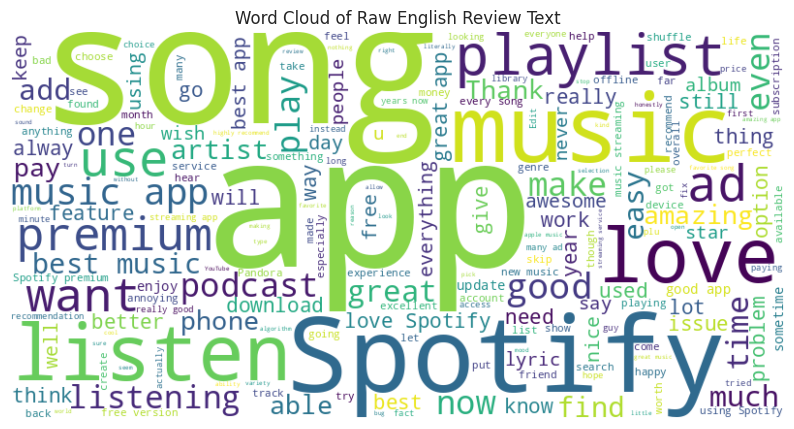

In [169]:
if raw_en_df is not None and 'content' in raw_en_df.columns:
    # Combine all English reviews into a single string
    all_en_reviews = " ".join(review for review in raw_en_df['content'].astype(str))

    # Generate English word cloud
    wordcloud_en = WordCloud(width=800, height=400, background_color='white').generate(all_en_reviews)

    # Display the English word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_en, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of Raw English Review Text')
    plt.show()
else:
    print("raw_en_df is None or 'content' column not found in raw_en_df. Cannot generate English word cloud.")

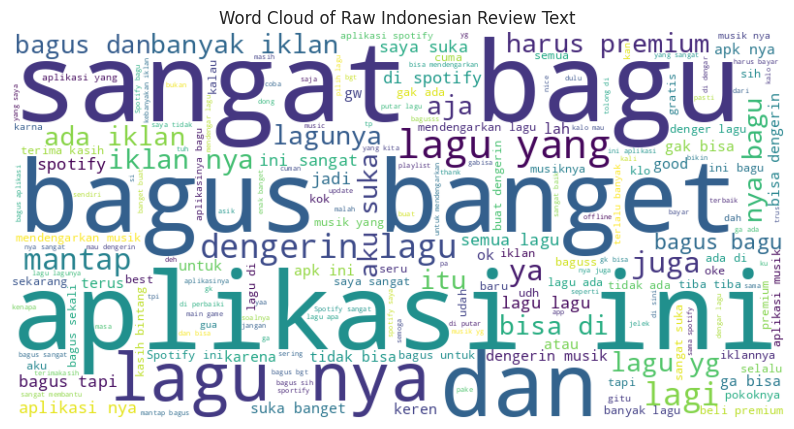

In [170]:
if raw_id_df is not None and 'content' in raw_id_df.columns:
    # Combine all Indonesian reviews into a single string
    all_id_reviews = " ".join(review for review in raw_id_df['content'].astype(str))

    # Generate Indonesian word cloud
    wordcloud_id = WordCloud(width=800, height=400, background_color='white').generate(all_id_reviews)

    # Display the Indonesian word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_id, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud of Raw Indonesian Review Text')
    plt.show()
else:
    print("raw_id_df is None or 'content' column not found in raw_id_df. Cannot generate Indonesian word cloud.")

### **5.3: Frequency Analysis of Words**

Analyzing the most frequent words in the review content for both English and Indonesian datasets using count plots. This provides a quantitative view of word occurrences, complementing the visual word cloud.

/tmp/ipython-input-1304874266.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_en_words_df, x='Count', y='Word', palette='viridis')


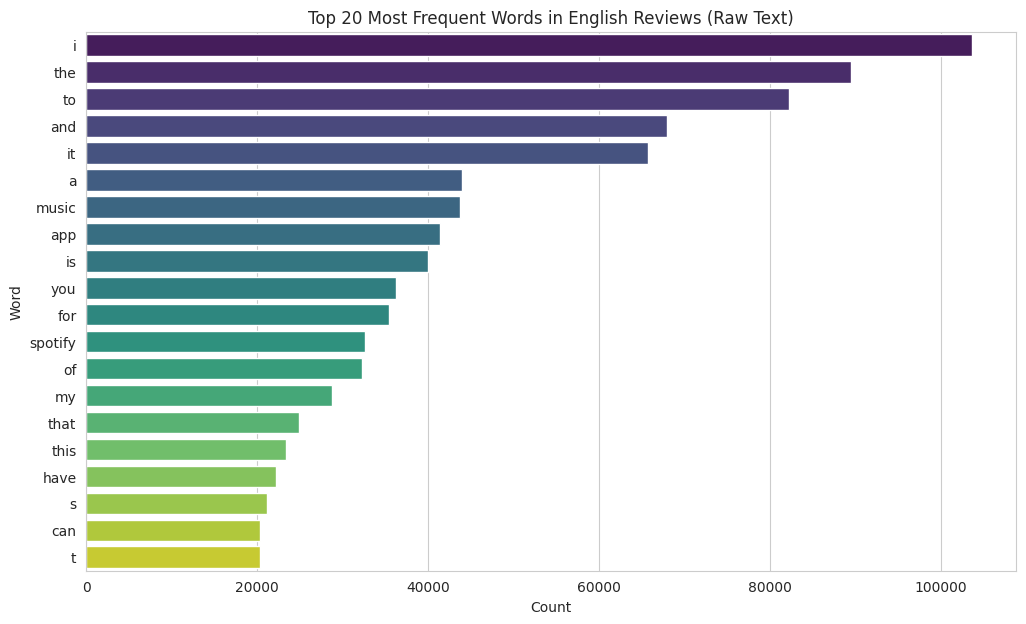

In [171]:
def get_top_n_words(corpus, n=None):
    """Helper function to get the top N words from a corpus."""
    words = [word.lower() for review in corpus for word in re.findall(r'\b\w+\b', str(review))]
    word_counts = Counter(words)
    return word_counts.most_common(n)

if raw_en_df is not None and 'content' in raw_en_df.columns:
    # Get top 20 most frequent words for English reviews
    top_en_words = get_top_n_words(raw_en_df['content'], n=20)

    # Create a dataframe for plotting
    top_en_words_df = pd.DataFrame(top_en_words, columns=['Word', 'Count'])

    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(data=top_en_words_df, x='Count', y='Word', palette='viridis')
    plt.title('Top 20 Most Frequent Words in English Reviews (Raw Text)')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()
else:
    print("raw_en_df is None or 'content' column not found. Cannot analyze English word frequency.")

/tmp/ipython-input-1303768991.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_id_words_df, x='Count', y='Word', palette='viridis')


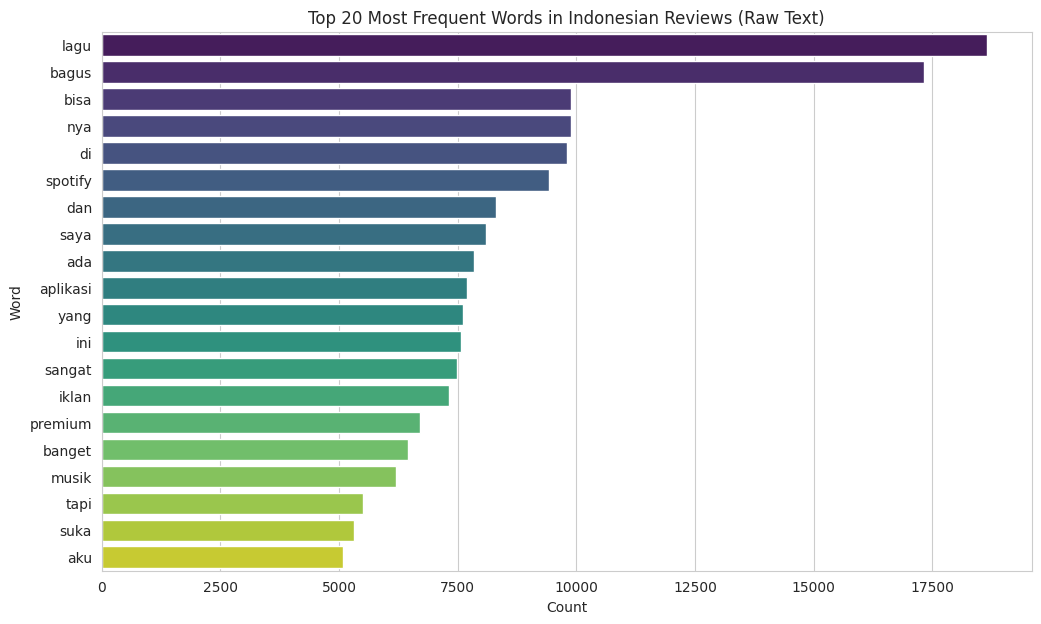

In [172]:
if raw_id_df is not None and 'content' in raw_id_df.columns:
    # Get top 20 most frequent words for Indonesian reviews
    top_id_words = get_top_n_words(raw_id_df['content'], n=20)

    # Create a dataframe for plotting
    top_id_words_df = pd.DataFrame(top_id_words, columns=['Word', 'Count'])

    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(data=top_id_words_df, x='Count', y='Word', palette='viridis')
    plt.title('Top 20 Most Frequent Words in Indonesian Reviews (Raw Text)')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()
else:
    print("raw_id_df is None or 'content' column not found. Cannot analyze Indonesian word frequency.")

**Analysis of Word Cloud:**

The word cloud provides a quick visual overview of the most frequently occurring words in the raw review text. As expected with unprocessed text, it contains many common words (stopwords) and potential noise. However, it gives a raw first impression of the dominant themes and keywords present in the reviews before any cleaning or preprocessing.

## **6. Temporal Analysis (Review Timestamps)**

Update the temporal analysis to plot the number of reviews over time for both English and Indonesian datasets, potentially on the same plot with different lines/colors or on separate subplots.


In [173]:
if raw_en_df is not None and 'at' in raw_en_df.columns:
    raw_en_df['at'] = pd.to_datetime(raw_en_df['at'], errors='coerce')
    raw_en_df.dropna(subset=['at'], inplace=True)
    raw_en_df['review_month'] = raw_en_df['at'].dt.to_period('M')
    monthly_reviews_en = raw_en_df.groupby('review_month').size()
    print(f"English reviews processed. Remaining rows: {len(raw_en_df)}")
else:
    monthly_reviews_en = None
    print("raw_en_df is None or 'at' column not found in raw_en_df. Cannot process English temporal data.")

English reviews processed. Remaining rows: 77078


In [174]:
if raw_id_df is not None and 'at' in raw_id_df.columns:
    raw_id_df['at'] = pd.to_datetime(raw_id_df['at'], errors='coerce')
    raw_id_df.dropna(subset=['at'], inplace=True)
    raw_id_df['review_month'] = raw_id_df['at'].dt.to_period('M')
    monthly_reviews_id = raw_id_df.groupby('review_month').size()
    print(f"Indonesian reviews processed. Remaining rows: {len(raw_id_df)}")
else:
    monthly_reviews_id = None
    print("raw_id_df is None or 'at' column not found in raw_id_df. Cannot process Indonesian temporal data.")

Indonesian reviews processed. Remaining rows: 59246


Plot the monthly review counts for both English and Indonesian reviews on the same plot, adding title, labels, legend, and rotating x-axis ticks.


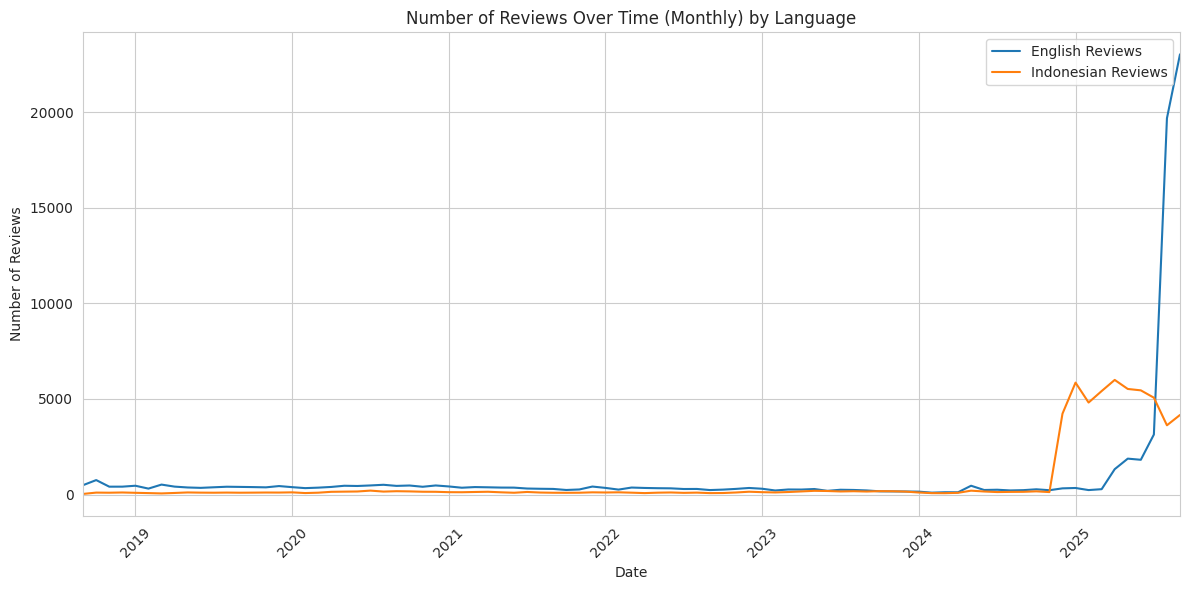

In [175]:
plt.figure(figsize=(12, 6))

if monthly_reviews_en is not None:
    monthly_reviews_en.plot(label='English Reviews')

if monthly_reviews_id is not None:
    monthly_reviews_id.plot(label='Indonesian Reviews')

if monthly_reviews_en is not None or monthly_reviews_id is not None:
    plt.title('Number of Reviews Over Time (Monthly) by Language')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No temporal review data available for plotting.")

**Analysis of Temporal Trends:**

The time series plot shows how the number of reviews has changed over the months. We can observe trends such as periods of increased or decreased review activity. Spikes in reviews might correlate with significant events like app updates, marketing campaigns, or service outages. A general upward or downward trend could indicate changes in user engagement over time.

## **7. Saving Processed Data**

Saving the processed English and Indonesian datasets to separate CSV files for further use in subsequent steps of the project.

In [176]:
output_dir = '../data/processed'
print(f"Listing contents of directory: {output_dir}")
if os.path.exists(output_dir):
    for item in os.listdir(output_dir):
        print(item)
else:
    print(f"Directory does not exist: {output_dir}")

Listing contents of directory: ../data/processed
spotify_reviews_indonesian_combine.csv
spotify_reviews_english_combine.csv


In [177]:
if raw_en_df is not None:
    output_path_en = '../data/processed/spotify_reviews_english_combine.csv'
    try:
        raw_en_df.to_csv(output_path_en, index=False)
        print(f"English dataset saved successfully to {output_path_en}")
    except Exception as e:
        print(f"Error saving English dataset: {e}")
else:
    print("English dataframe is not available to save.")

if raw_id_df is not None:
    output_path_id = '../data/processed/spotify_reviews_indonesian_combine.csv'
    try:
        raw_id_df.to_csv(output_path_id, index=False)
        print(f"Indonesian dataset saved successfully to {output_path_id}")
    except Exception as e:
        print(f"Error saving Indonesian dataset: {e}")
else:
    print("Indonesian dataframe is not available to save.")

English dataset saved successfully to ../data/processed/spotify_reviews_english_combine.csv
Indonesian dataset saved successfully to ../data/processed/spotify_reviews_indonesian_combine.csv


In [178]:
# List contents of the parent directory
print("Contents of the parent directory (../):")
%ls ../

# List contents of the data directory
print("\nContents of the data directory (../data):")
%ls ../data

# List contents of the processed directory
print("\nContents of the processed directory (../data/processed):")
%ls ../data/processed

Contents of the parent directory (../):
bin@                        home/    NGC-DL-CONTAINER-LICENSE  srv/
boot/                       kaggle/  opt/                      sys/
content/                    lib@     proc/                     tmp/
cuda-keyring_1.1-1_all.deb  lib32@   python-apt/               tools/
data/                       lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/
etc/                        mnt/     sbin@

Contents of the data directory (../data):
processed/

Contents of the processed directory (../data/processed):
spotify_reviews_english_combine.csv  spotify_reviews_indonesian_combine.csv


## **8. Conclusion & Next Steps**

**Conclusion:**

This initial EDA on the raw Spotify reviews dataset has provided valuable insights into its structure, quality, and content. We have examined:
- The dataset's basic information and structure.
- The presence of missing values and duplicate rows.
- The distribution of review scores, indicating the overall sentiment.
- The characteristics of the review text, including length and the most frequent raw words.
- The temporal trends in review submission.

The raw text data, as seen in the word cloud, is noisy and requires significant cleaning and preprocessing before it can be effectively used for tasks like sentiment analysis or topic modeling.

**Next Steps:**

The logical next step in this project, which will be covered in the notebook `03_data_preprocessing_and_cleaning.ipynb`, is to clean and preprocess the raw text data. This will involve steps such as:
- Handling missing values and duplicate rows (if not already done).
- Text cleaning (e.g., removing punctuation, special characters, numbers).
- Lowercasing the text.
- Tokenization.
- Removing stopwords.
- Stemming or lemmatization.
- Handling bilingual text (if necessary).

These preprocessing steps are crucial to transform the raw review text into a format suitable for further analysis and machine learning models.